# Final Project Submission

In [2]:
## Questions

# - should I have removed N/A's instead?
# - duplicate ID's are ok?
# - do we need to do a GQ test?
# - do we log transform the y variable?
# - feature scaling / normalization on variables? Also which one if so?
# - multicollinearity in categorical variables?


In [3]:
# Please fill out:
# * Student name: Sabina Bains
# * Student pace: Self Paced
# * Scheduled project review date / time: ??????
# * Instructor name: Claude Fried

Business Problem:

A Homeless program called HFH in King County has reached out to you to help create a model to help the homeless get back their feet. 

Along with inititaves such as homeless shelters, career services, and other interim programs,
HFH purchases homes and rents them out to those in their program who are ready for a more permanent residence. The new resident then has the opportunity to pay off the mortgage and own the home. 

Some of the requirements for being condidered for this program is having a full-time job, choosing a home close to their place of work (to elimate the need to own a car), and the applicant's monthly salary must be enough to pay 30% of the monthly mortgage payment.

HFH wants to be able to filter by zipcode in King County and det

### Importing Packages and Reading in Data

In [4]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import numpy as np
# plt.style.use('ggplot')

style.use('dark_background')
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

In [5]:
# importing King County House Sales dataset
df = pd.read_csv('data/kc_house_data.csv')

In [6]:
# Variable Definitions
'''
id : A notation for a house
date: Date house was sold
price: Price is prediction target
bedrooms: Number of bedrooms
bathrooms: Number of bathrooms
sqft_living: Square footage of the home
sqft_lot: Square footage of the lot
floors :Total floors (levels) in house
waterfront :House which has a view to a waterfront
view: Has been viewed
condition :How good the condition is overall
grade: overall grade given to the housing unit, based on King County grading system
sqft_above : Square footage of house apart from basement
sqft_basement: Square footage of the basement
yr_built : Built Year
yr_renovated : Year when house was renovated
zipcode: Zip code
lat: Latitude coordinate
long: Longitude coordinate
sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
sqft_lot15 : LotSize area in 2015(implies-- some renovations
'''
None

# Data Exploration

### Handling N/A's

In [7]:
df.describe()
len(df)

print('''
This data set is comprised of {} rows.
N/A's:
{}
'''.format(len(df),df.isna().sum()))


This data set is comprised of 21597 rows.
N/A's:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64



In [8]:
## checking waterfront column
print('''Unique values are {} removing waterfront N/A's would remove {} of the overall dataset'''
      .format(df.waterfront.unique(), '{:0.1%}'.format(df.waterfront.isna().sum() / len(df))))

Unique values are [nan  0.  1.] removing waterfront N/A's would remove 11.0% of the overall dataset


In [9]:
## filling waterfront NAs with 0
df.waterfront.fillna(0,inplace=True)

In [10]:
## checking view column
print('''Unique values are {} removing view N/A's would remove {} of the overall dataset'''
      .format(df.view.unique(), '{:0.1%}'.format(df.view.isna().sum() / len(df))))

Unique values are [ 0. nan  3.  4.  2.  1.] removing view N/A's would remove 0.3% of the overall dataset


In [11]:
## filling view NAs
df.view.fillna(0,inplace=True)

In [12]:
## checking yr_renovated column
print('''Unique values are {} removing view N/A's would remove {} of the overall dataset'''
      .format(df.yr_renovated.unique(), '{:0.1%}'.format(df.yr_renovated.isna().sum() / len(df))))

Unique values are [   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.] removing view N/A's would remove 17.8% of the overall dataset


In [13]:
## filling yr_renovated NAs
df.yr_renovated.fillna(0,inplace=True)

In [14]:
# Investigating Duplicate ID's

In [15]:
print('''{} id's are duplicated. do we keep those?'''.format(len(df) - len(df.id.unique())))

177 id's are duplicated. do we keep those?


In [16]:
dup_id_list = df.loc[df.id.duplicated()]['id'].to_list()
dup_id_df = df.loc[df.id.isin(dup_id_list)]
dup_id_df_sort = dup_id_df.sort_values(by=['id','date'],ascending = False)
dup_id_df_sort.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1084,9834200885,7/17/2014,360000.0,4,2.5,2080,4080,1.0,0.0,0.0,5,7,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080
1085,9834200885,4/20/2015,550000.0,4,2.5,2080,4080,1.0,0.0,0.0,5,7,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080
15185,9834200305,7/16/2014,350000.0,3,1.0,1790,3876,1.5,0.0,0.0,5,7,1090,?,1904,0.0,98144,47.5750,-122.288,1360,4080
15186,9834200305,2/10/2015,615000.0,3,1.0,1790,3876,1.5,0.0,0.0,5,7,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080
6339,9828200460,6/27/2014,260000.0,2,1.0,700,4800,1.0,0.0,0.0,3,7,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800


In [17]:
dup_id_df_sort_nodate = dup_id_df_sort.drop(['date','price'],axis=1)
dup_id_df_sort_nodate.duplicated().sum()
# duplicate ID's mostly have updated price and dates but same data. Keep both?

173

### Handling Data Types

In [18]:
df.info()

print('''-------------- NOTES: ---------------
id should be str
date should be datetime (?)
sqft_basement should be int or float
yr_built should be str? - NO FOR NOW
yr_renovated should be str? - NO FOR NOW
zipcode should be str
waterfront - str
''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
def new_dtype(col,dtype):
    df.col = df.col.astype(dtype)

In [20]:
# Changing Zip and ID to String Vars, other to Int from Float
df.zipcode = df.zipcode.astype(str)
df.id = df.id.astype(str)
df.waterfront = df.waterfront.astype(str)
df.view = df.view.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)
df.price = df.price.astype(int)

In [21]:
## Removing sqft_basement with "?" and changing dtype to int
df = df.loc[~(df.sqft_basement == '?')]
df.sqft_basement = df.sqft_basement.astype(float).astype(int)
print('there are ',len(df.loc[df.sqft_basement == '?']),' rows with "?".')

there are  0  rows with "?".


In [22]:
df.info()
print('''------- notes: ---------
Everything looks good now''')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  object 
 1   date           21143 non-null  object 
 2   price          21143 non-null  int64  
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  int64  
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  int64  
 16  zipcode        21143 non-null  object 
 17  lat            21143 non-null  float64
 18  long  

### CHECKING 4 ASSUMPTIONS OF MULTIPLE LINEAR REGRESSION

In [23]:
#SPLITTING INTO CONTINOUS AND DISCRETE VARIABLES
# cont = df.select_dtypes(['int','float']).drop('price',axis=1)
# disc = df.select_dtypes('object')
x_cont = df[['sqft_living','sqft_lot','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15','bathrooms','bedrooms', 'condition', 'grade','floors','price']]
x_cat = df[[ 'waterfront', 'view','zipcode']]

In [25]:
x_cont

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,bathrooms,bedrooms,condition,grade,floors,price
0,1180,5650,1180,0,1955,0,47.5112,-122.257,1340,5650,1.00,3,3,7,1.0,221900
1,2570,7242,2170,400,1951,1991,47.7210,-122.319,1690,7639,2.25,3,3,7,2.0,538000
2,770,10000,770,0,1933,0,47.7379,-122.233,2720,8062,1.00,2,3,6,1.0,180000
3,1960,5000,1050,910,1965,0,47.5208,-122.393,1360,5000,3.00,4,5,7,1.0,604000
4,1680,8080,1680,0,1987,0,47.6168,-122.045,1800,7503,2.00,3,3,8,1.0,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,2009,0,47.6993,-122.346,1530,1509,2.50,3,3,8,3.0,360000
21593,2310,5813,2310,0,2014,0,47.5107,-122.362,1830,7200,2.50,4,3,8,2.0,400000
21594,1020,1350,1020,0,2009,0,47.5944,-122.299,1020,2007,0.75,2,3,7,2.0,402101
21595,1600,2388,1600,0,2004,0,47.5345,-122.069,1410,1287,2.50,3,3,8,2.0,400000


##### CHECKING LINEARITY

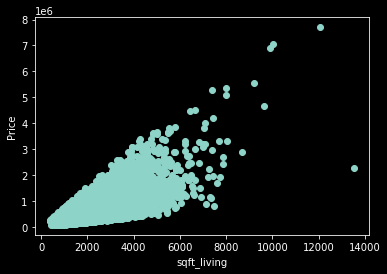

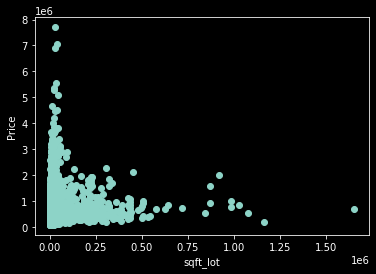

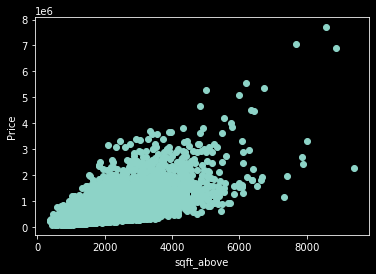

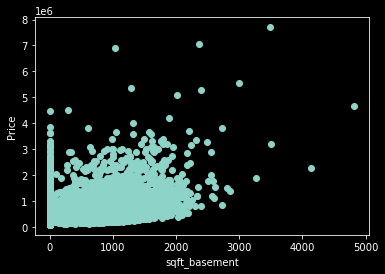

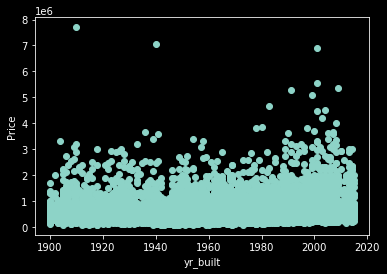

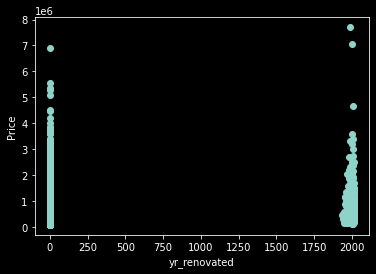

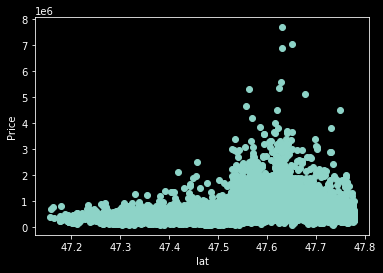

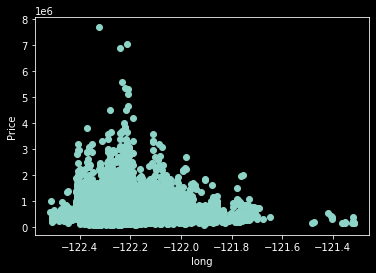

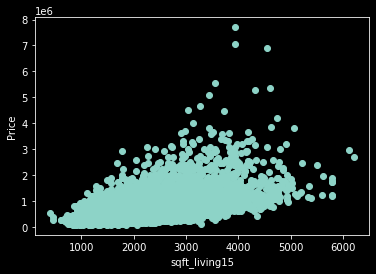

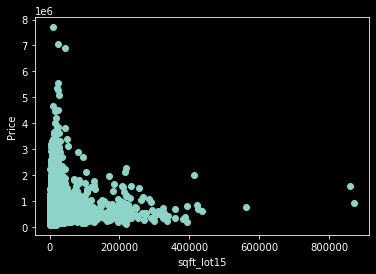

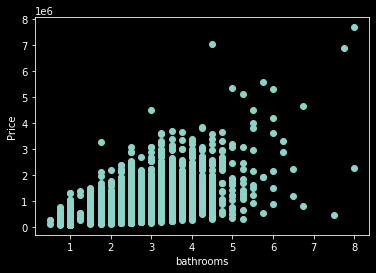

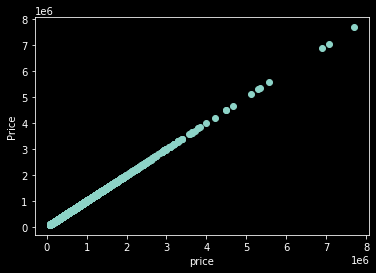


----------- NOTES: ------------
sqft_lot is not linear
sqft_basement seems not linear (should be Y/N variable?)
yr_built is not linear
yr_renovated is not linear (should be Y/N variable?)
lat is not linear
long is not linear
sqft_lot15 is not linear



In [88]:
# #Checking Linearity of Predictors to Dependent variable
for col in x_cont.columns:
    plt.scatter(x_cont[col],x_cont['price'])
    plt.xlabel(col)
    plt.ylabel('Price')
#     plt.xlim([25, 50])
    plt.show()
    
print('''
----------- NOTES: ------------
sqft_lot is not linear
sqft_basement seems not linear (should be Y/N variable?)
yr_built is not linear
yr_renovated is not linear (should be Y/N variable?)
lat is not linear
long is not linear
sqft_lot15 is not linear
''')

In [89]:
## Turning sqft_basement and yr_renovated into binary variables
def make_binary(row):
    if row > 0:
        return 1
    if row == 0:
        return 0
    
df['has_basement'] = df['sqft_basement'].apply(make_binary)
df['renovated'] = df['yr_renovated'].apply(make_binary)

In [90]:
## dropping vars that do not pass assumption, and adding new dummy vars into x_cat
x_cont.drop(['sqft_lot','sqft_lot15','yr_built','lat','long','sqft_basement','yr_renovated'],axis=1,inplace=True)
x_cat[['has_basement','renovated']] = df[['has_basement','renovated']]

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


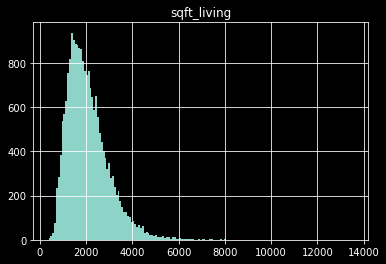

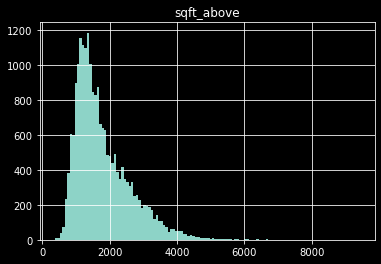

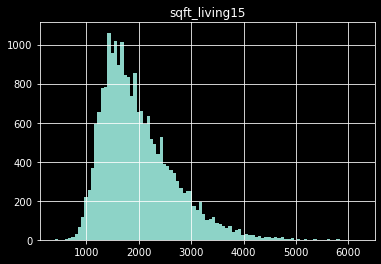

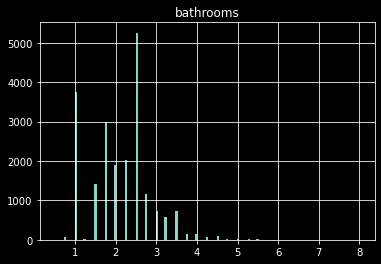

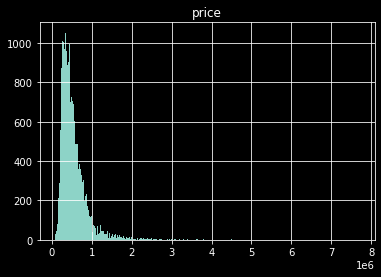

In [91]:
## Checking Normality of Variables ( Not an assumption, but just for reference )
## Variables seem skewed

for col in x_cont.columns:
    df.hist(col,bins='auto')

#### CHECKING FOR NORMAL DISTRIBUTION OF RESIDUALS AND HOMOSCEDASTICITY

sqft_living [('Jarque-Bera', 535834.1592049835), ('Prob', 0.0), ('Skew', 2.825489391280089), ('Kurtosis', 27.006384771306482)]
sqft_above [('Jarque-Bera', 722743.7493020119), ('Prob', 0.0), ('Skew', 3.2800031810005033), ('Kurtosis', 30.881402345951727)]
sqft_living15 [('Jarque-Bera', 1902415.5294572685), ('Prob', 0.0), ('Skew', 4.221471362696799), ('Kurtosis', 48.69683617210795)]
bathrooms [('Jarque-Bera', 873638.291948605), ('Prob', 0.0), ('Skew', 3.4636299666388335), ('Kurtosis', 33.71976383036604)]

--------- NOTES: ----------
None of these variables have normally distributed residuals.
    All variables have a large JB test, assuming the data is not normal.
    All values have a positive skew except price which has a negative skew
    All values have a high Kurtosis value meaning very heavy tails and therefore outliers (3 is normal dist)
None of these variables are Homoscedastic

*****We will have to transform this data*****



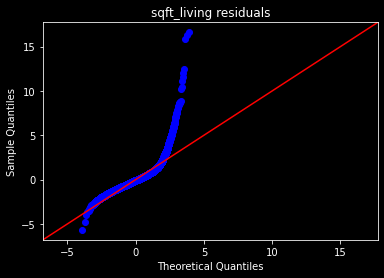

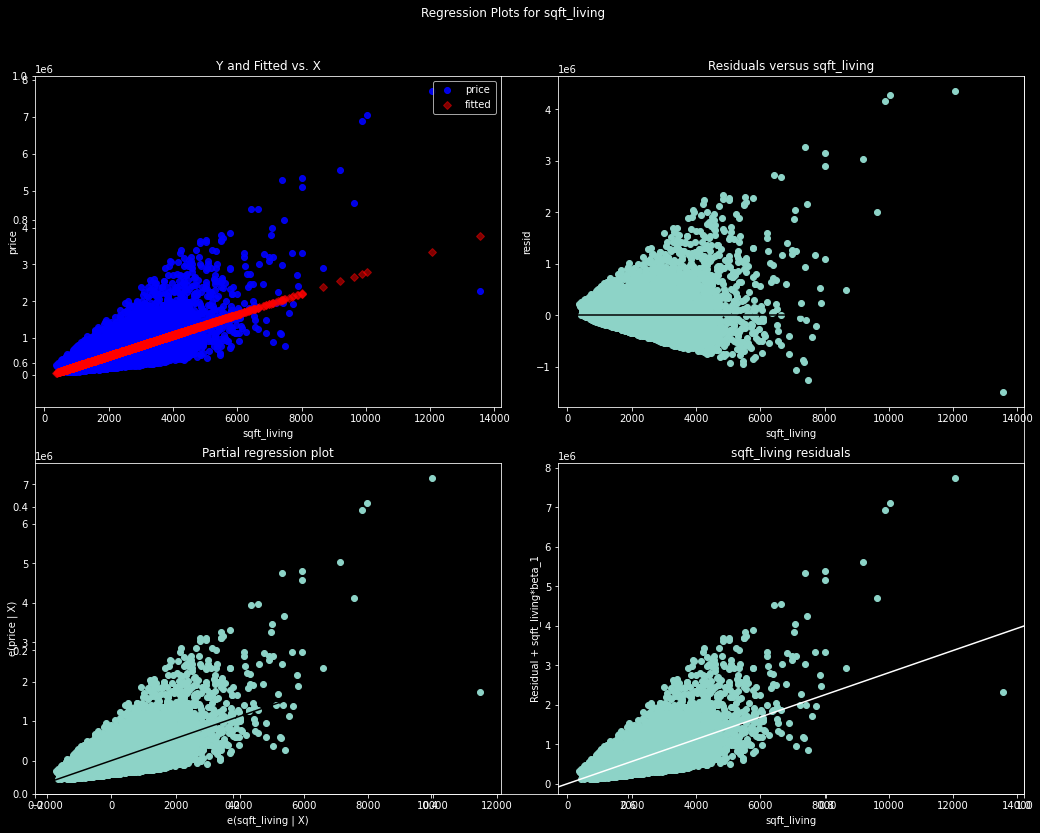

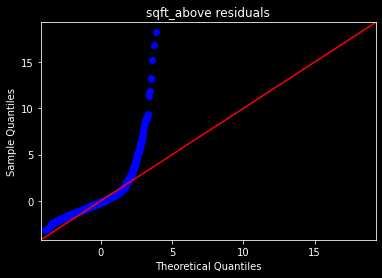

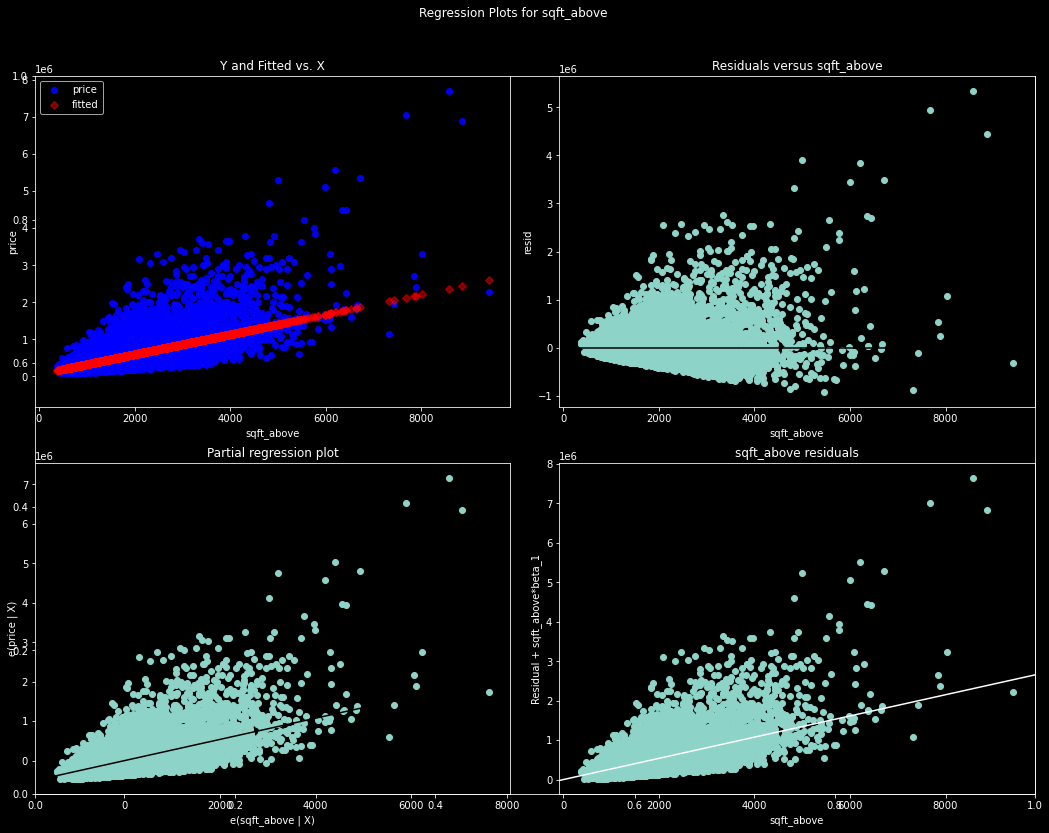

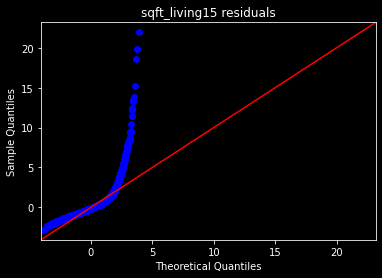

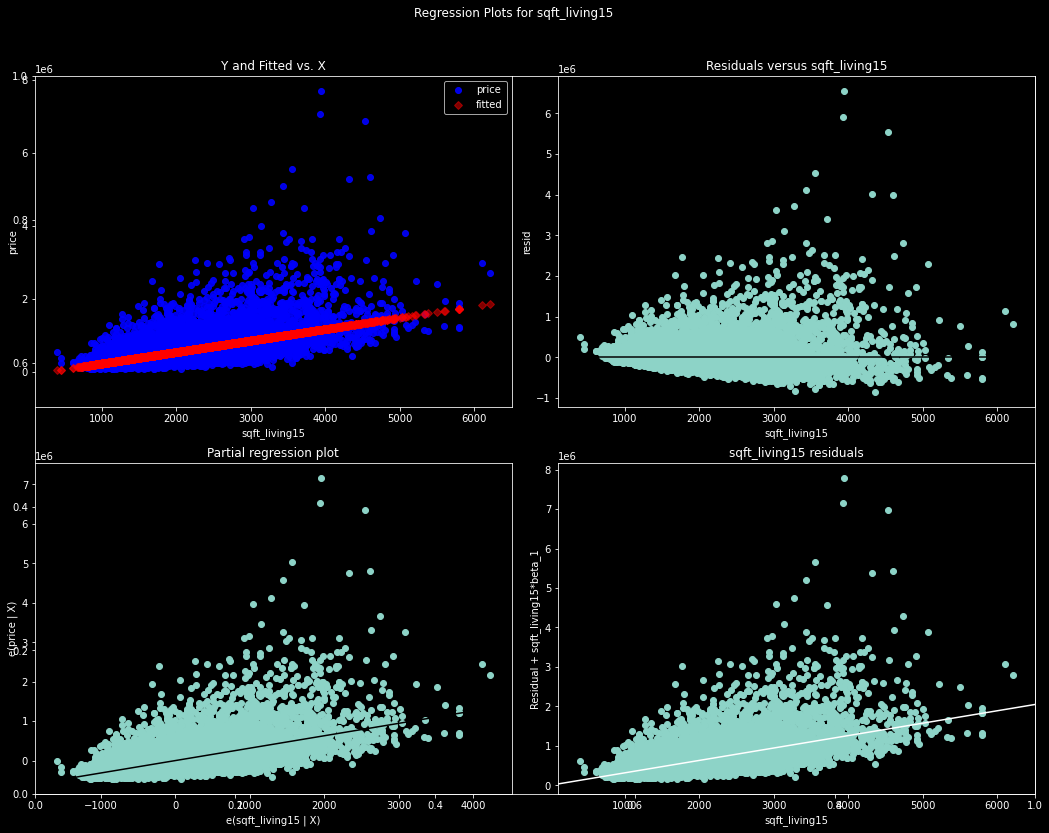

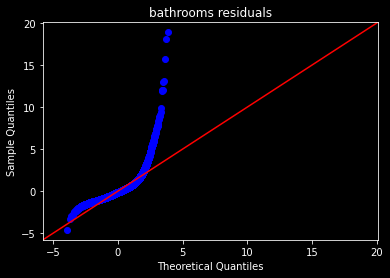

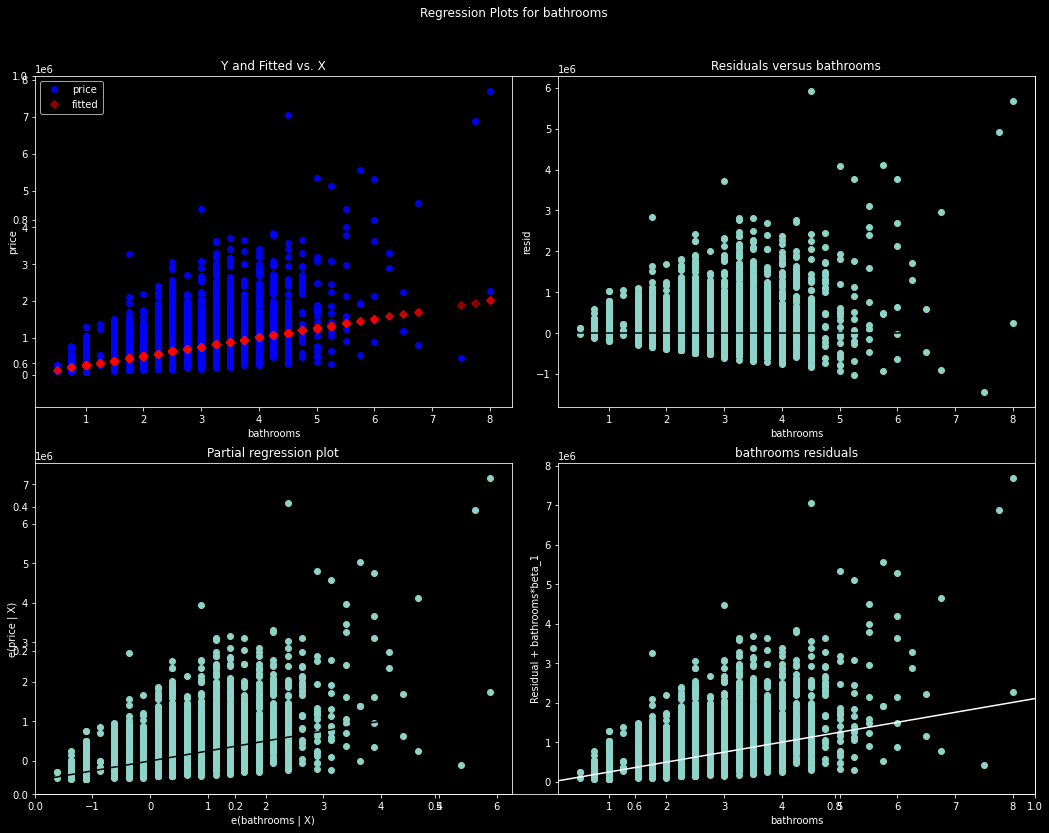

In [92]:
for col in x_cont.drop('price',axis=1):
    f = 'price ~ '+col
    model = smf.ols(formula=f, data=x_cont).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(col+' residuals')
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.title(col+' residuals')
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(model.resid)
    print(col, list(zip(name, test)))
    
print('''
--------- NOTES: ----------
None of these variables have normally distributed residuals.
    All variables have a large JB test, assuming the data is not normal.
    All values have a positive skew except price which has a negative skew
    All values have a high Kurtosis value meaning very heavy tails and therefore outliers (3 is normal dist)
None of these variables are Homoscedastic

*****We will have to transform this data*****
''')

##### TRANSFORMING CONTINUOUS VARIABLES

In [53]:
x_cont_log = pd.DataFrame()
for col in x_cont:
    x_cont_log[col+'_log'] = x_cont[col].map(lambda x: np.log(x))

sqft_living_log [('Jarque-Bera', 111.90865770285579), ('Prob', 5.004304656889962e-25), ('Skew', 0.14397703821985722), ('Kurtosis', 2.7899689526968214)]
sqft_above_log [('Jarque-Bera', 140.34624990158594), ('Prob', 3.343482511904254e-31), ('Skew', 0.19135645820910308), ('Kurtosis', 2.8866787463468007)]
sqft_living15_log [('Jarque-Bera', 468.7796098581179), ('Prob', 1.6062054860842345e-102), ('Skew', 0.28849542668000205), ('Kurtosis', 3.446325179087208)]
bathrooms_log [('Jarque-Bera', 339.50199840749343), ('Prob', 1.8970455036187488e-74), ('Skew', 0.3059306834065428), ('Kurtosis', 3.1048985735692614)]

--------- NOTES: ----------
Variable residuals are more distributed now. 
    JB values are much lower now
    All values have a skew ~ 0 
    All values have a high Kurtosis ~ 3 which implies normal 
Variables are heteroscedastic now.



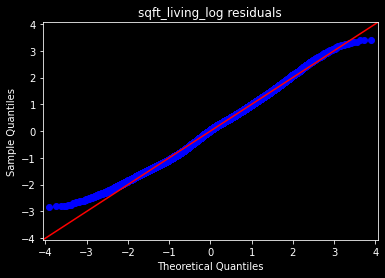

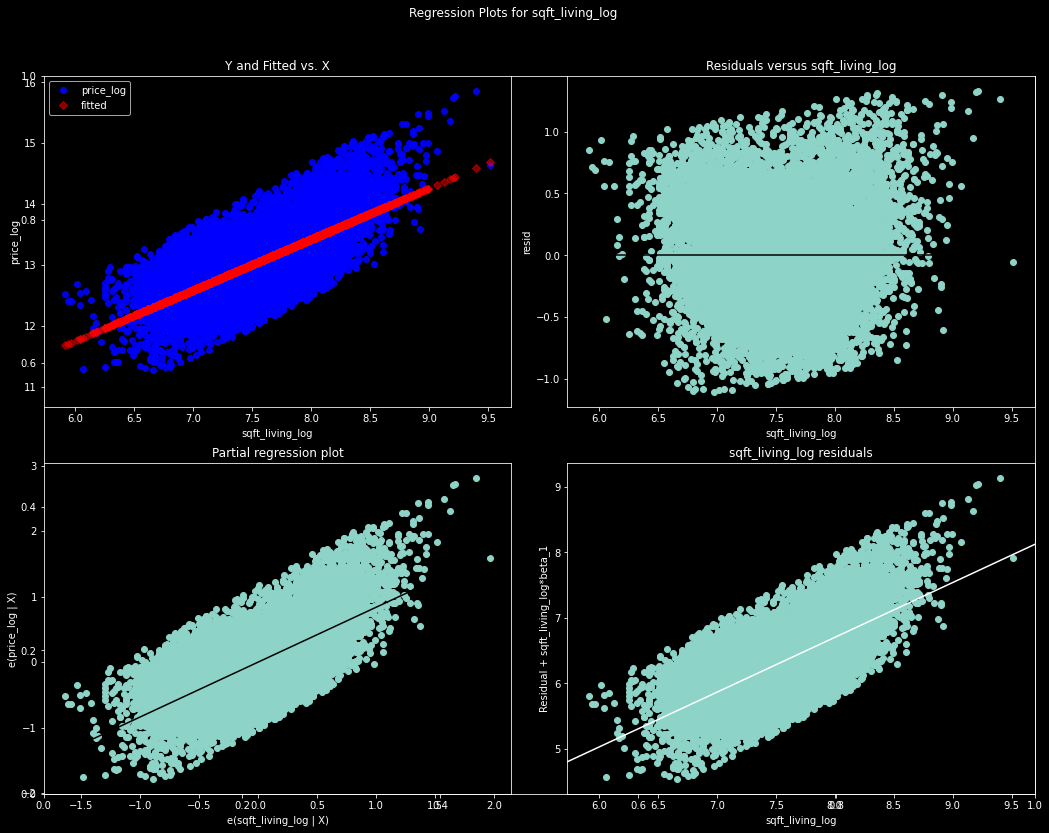

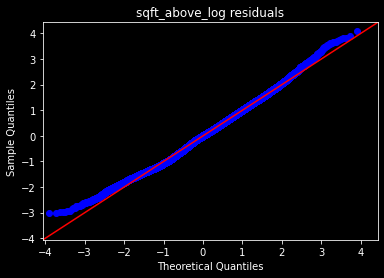

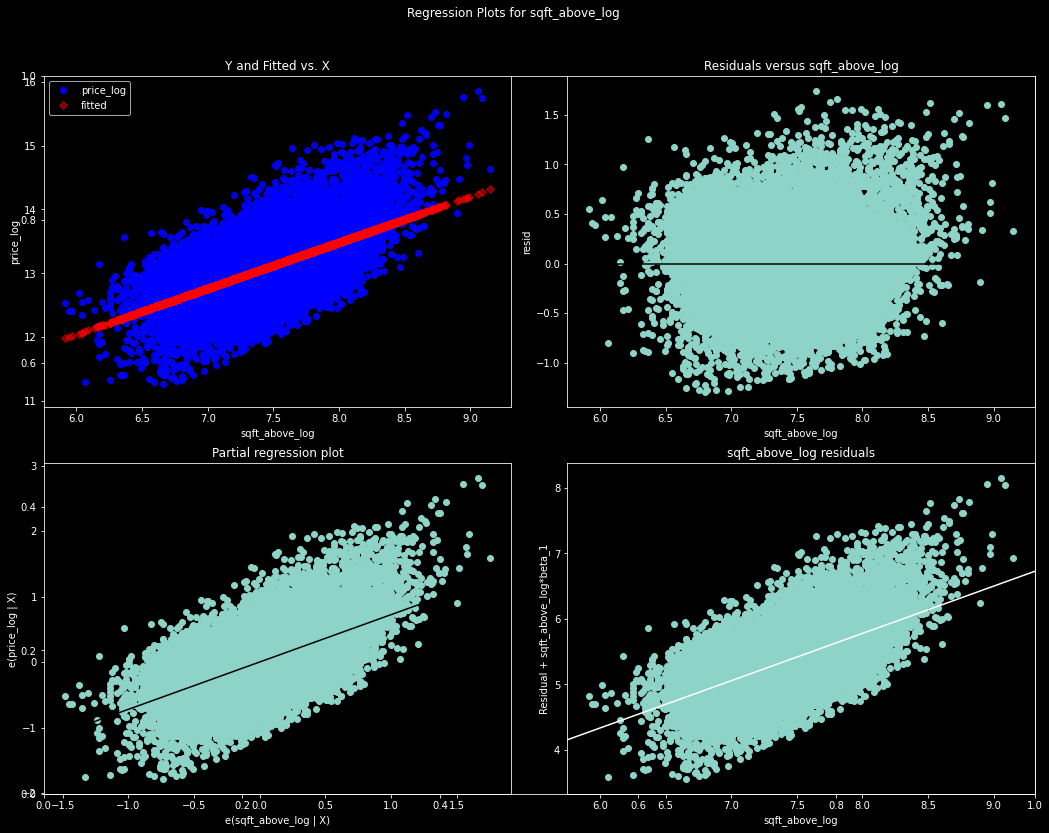

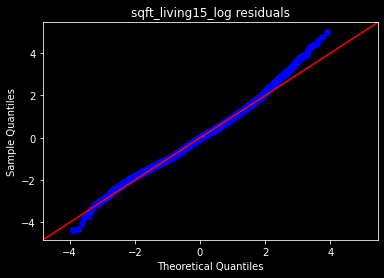

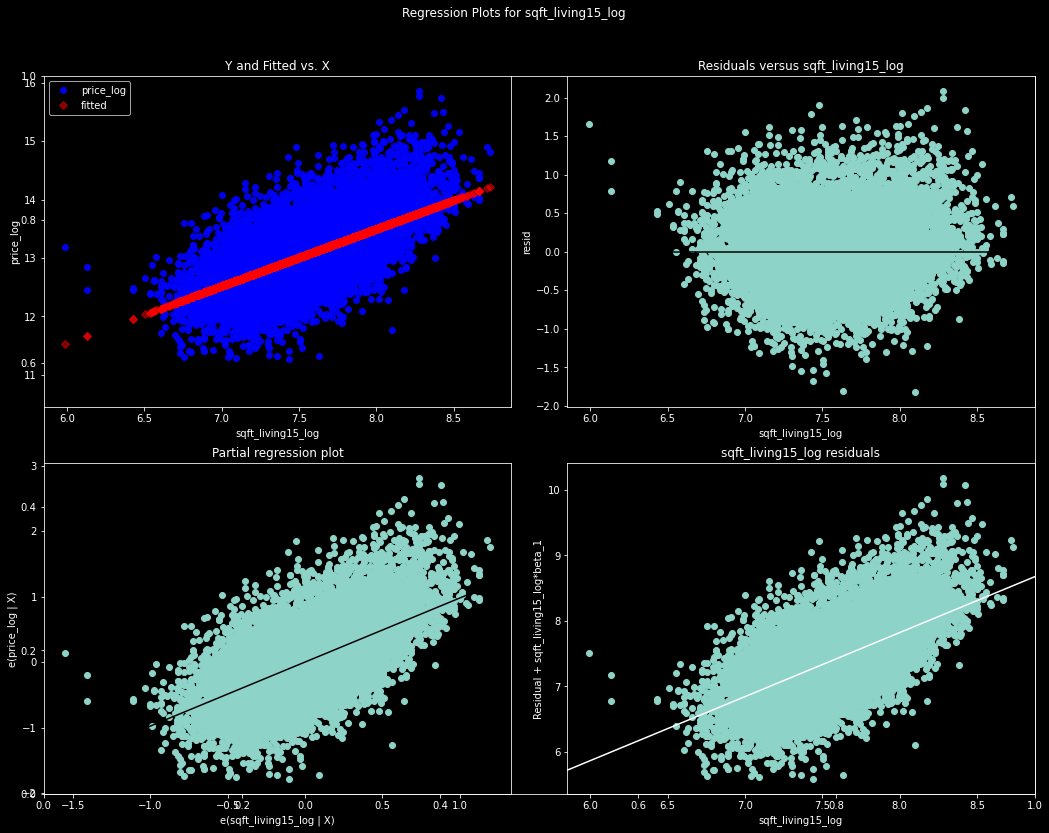

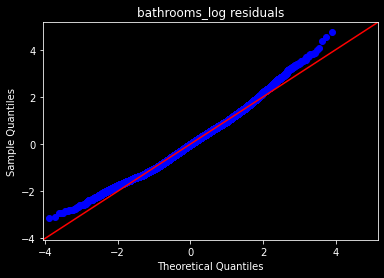

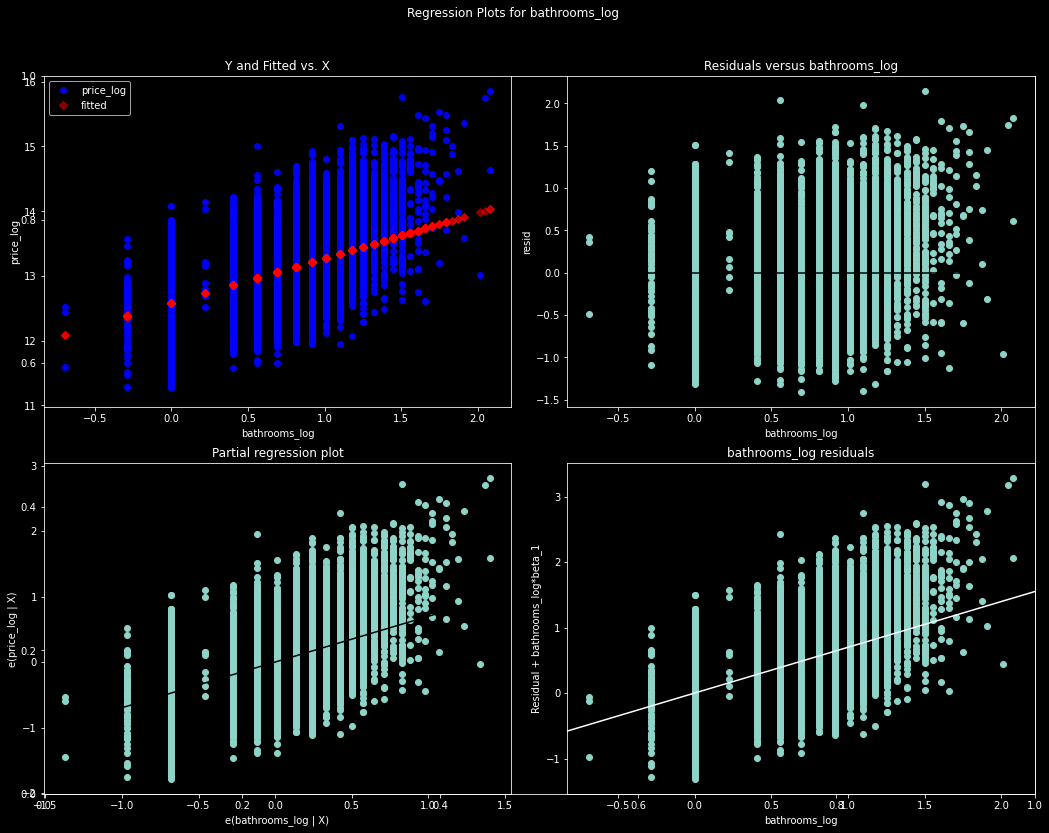

In [56]:
for col in x_cont_log.drop('price_log',axis=1):
    f = 'price_log ~ '+col
    model = smf.ols(formula=f, data=x_cont_log).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(col+' residuals')
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.title(col+' residuals')
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(model.resid)
    print(col, list(zip(name, test)))
    
print('''
--------- NOTES: ----------
Variable residuals are more distributed now. 
    JB values are much lower now
    All values have a skew ~ 0 
    All values have a high Kurtosis ~ 3 which implies normal 
Variables are heteroscedastic now.
''')

#### FEATURE SCALING AND NORMALIZATION?

In [31]:
# acc = data_pred['acceleration']
# logdisp = data_log['logdisp']
# loghorse = data_log['loghorse']
# logweight = data_log['logweight']

# scaled_acc = (acc - min(acc)) / (max(acc) - min(acc))
# scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
# scaled_weight = (logweight - np.mean(logweight)) / np.sqrt(np.var(logweight))
# scaled_horse = (loghorse - np.mean(loghorse)) / (max(loghorse) - min(loghorse))

# data_cont_scaled = pd.DataFrame([])
# data_cont_scaled['acc'] = scaled_acc
# data_cont_scaled['disp'] = scaled_disp
# data_cont_scaled['horse'] = scaled_horse
# data_cont_scaled['weight'] = scaled_weight

# data_cont_scaled.hist(figsize = [6, 6]);


### Do we need to do feature scaling / normalization?


##### HANDLING CATEGORICAL VARIABLES

In [32]:
# checking out how many unique values are in each cat value
for col in x_cat.columns:
    print(x_cat[col].unique())

[ 3  2  4  5  1  6  7  8  9 11 10 33]
[1.  2.  1.5 3.  2.5 3.5]
['0.0' '1.0']
[0 3 4 2 1]
[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13]
['98178' '98125' '98028' '98136' '98074' '98053' '98198' '98146' '98038'
 '98007' '98115' '98107' '98126' '98019' '98103' '98003' '98133' '98040'
 '98092' '98030' '98002' '98119' '98112' '98052' '98027' '98117' '98058'
 '98001' '98056' '98166' '98023' '98070' '98148' '98105' '98042' '98008'
 '98059' '98122' '98144' '98004' '98005' '98034' '98075' '98116' '98118'
 '98199' '98032' '98045' '98102' '98077' '98108' '98168' '98177' '98065'
 '98029' '98006' '98109' '98022' '98033' '98155' '98024' '98011' '98031'
 '98010' '98106' '98072' '98188' '98014' '98055' '98039']
[0 1]
[0 1]


In [33]:
x_cat_dummies_list = []
for idx, col in enumerate(x_cat.columns):
    x_cat_dummies_list.append(pd.get_dummies(x_cat[col], prefix=col, drop_first=True))
    
x_cat_dummies = pd.concat(x_cat_dummies_list, axis=1)

##### CHECKING FOR MULTICOLLINEARITY

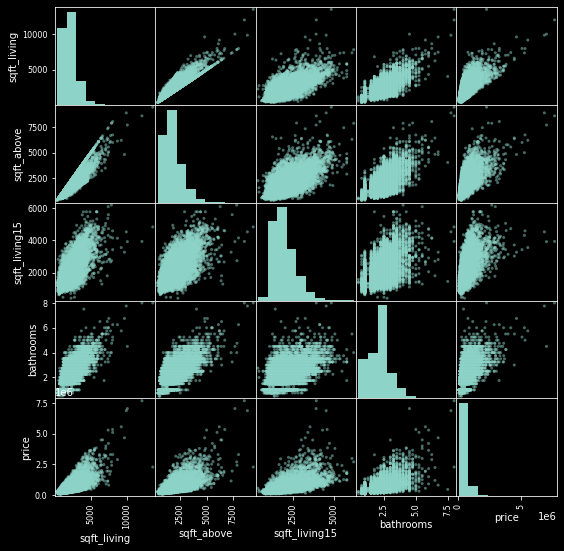

In [34]:
## Looking at relationship between remaining continuous variables 
pd.plotting.scatter_matrix(x_cont,figsize  = [9, 9]);
plt.show()

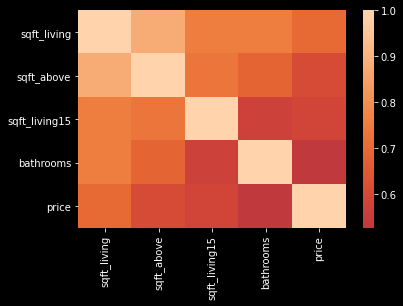

In [58]:
# Another view. shows sqft_living and sqft_above highly correlated which makes sense. 
sns.heatmap(x_cont.corr(), center=0);

In [59]:
x_cont_log

,sqft_above_log,sqft_living15_log,bathrooms_log,price_log
0,7.073270,7.200425,0.000000,12.309982
1,7.682482,7.432484,0.810930,13.195614
2,6.646391,7.908387,0.000000,12.100712
3,6.956545,7.215240,1.098612,13.311329
4,7.426549,7.495542,0.693147,13.142166
...,...,...,...,...
21592,7.333023,7.333023,0.916291,12.793859
21593,7.745003,7.512071,0.916291,12.899220
21594,6.927558,6.927558,-0.287682,12.904459
21595,7.377759,7.251345,0.916291,12.899220


In [60]:
# Viewing Correlation Between Each Variable ad Checking which variables have a correlation > 0.7 as this could suggest multicollinearity
x_cont_corr = x_cont_log.corr().abs().stack().reset_index()
x_cont_corr['preds'] = x_cont_corr['level_0']+' & '+x_cont_corr['level_1']
x_cont_corr = x_cont_corr.drop(['level_0','level_1'],axis = 1).rename(columns={0:'corr'}).sort_values(by='corr',ascending = False)
x_cont_corr.loc[(x_cont_corr['corr'] > 0.7) & (x_cont_corr['corr'] != 1)]

,corr,preds
1,0.71247,sqft_above_log & sqft_living15_log
4,0.71247,sqft_living15_log & sqft_above_log


In [57]:
## Looks like sqft_living is what is correlating with each predictor. Lets drop this. 
x_cont_log.drop('sqft_living_log',axis=1,inplace=True)

In [39]:
#Creating Final Dataset

In [61]:
final_preds = pd.concat([x_cat_dummies,x_cont_log.drop('price_log',axis=1)], axis = 1)

In [62]:
final_preds.head()

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1,sqft_above_log,sqft_living15_log,bathrooms_log
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7.073270,7.200425,0.000000
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7.682482,7.432484,0.810930
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.646391,7.908387,0.000000
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,6.956545,7.215240,1.098612
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.426549,7.495542,0.693147


In [63]:
# df.groupby(by='zipcode').mean().sort_values(by='price',ascending=False)['price'].astype(int)

#### Running the model

In [64]:
# predictors_int = sm.add_constant(final_preds)
# model = sm.OLS(df['price'],predictors_int).fit()
# model.summary() # Rs of 0.821

# # predictors_int = sm.add_constant(final_preds.drop(['bedrooms_33','floors_3.5','grade_10','zipcode_98022'],axis=1))
# # model = sm.OLS(df['price'],predictors_int).fit()
# # model.summary() # Rs of 0.821

#### Assessing Best Fit Model

In [44]:
X = final_preds
y = df.price

In [45]:
# #from sklearn.datasets import make_friedman1
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# linreg = LinearRegression()
# selector = RFE(linreg, n_features_to_select=3)
# selector = selector.fit(predictors, data_fin['mpg'])

In [46]:
# Your code here
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=10)
selector = selector.fit(X, y)

In [47]:
selector.support_ 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [48]:
selector.ranking_

array([ 87,  84,  83,  88,  92,  85,  46,  43,  33,  62,  91,  82,  78,
        55,  67,  94,   1,  45,  50,  13,   1,  66,  65,  64,  53,   4,
         5,   6,   7,   8,  10,  86,   1,   1,   1,  98,  96,   1,  15,
        24,  26,  23,  70,  49,  54,  58,  97,  80,  34,  37,  48,  36,
        99,  90,  93,  12,  31,  77,   1,   1,  95,  56,  28,  32,  74,
        60,  76,  61,  57,  89,  38,  40,  39,  47,  81,   9,  16,   1,
        52,  19,  51,   3,   1,  14,  21,  17,  35,   2,  18,  30,  29,
        41,  25,  22,  59,  68,  42,  71,  72,  27,  75,  73, 100,  11,
        44,  63,  20,  69,  79])

In [49]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 556278.75741674  515212.66913586  793761.24114558 1372289.01689715
 2869579.41923581  745978.36352502 1237573.43943831  567234.88658381
  364745.9758498   579042.06266115]
474515.71539424616


In [50]:
selected_columns = X.columns[selector.support_ ]

In [51]:
selected_columns

Index(['waterfront_1.0', 'view_4', 'grade_11', 'grade_12', 'grade_13',
       'zipcode_98004', 'zipcode_98039', 'zipcode_98040', 'zipcode_98105',
       'zipcode_98112'],
      dtype='object')